# Some maybe usefull stuff:
- Lets keep all the question to Antonio to trello
- The code to mark text: $**<code style="background:yellow;color:blue"> text</code>**$

In [7]:
# pip install -U imbalanced-learn

In [50]:
#pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# 1. Importing dependencies and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import streamlit as st
import os

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
#Getting the data

raw_data = pd.read_csv(r"C:\Users\katar\OneDrive\Dokumenty\Edukacja\Data Science\6_DS_Project\Project\03_Coding\Cards_data\creditcard.csv")

#raw_data = pd.read_csv(r"D:\06_projekt_i_data_science\coding ground\raw data\creditcard.csv")

# 2. Sanity checking the WHOLE dataset

In [10]:
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
raw_data.shape

(284807, 31)

In [12]:
raw_data.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### **<code style="background:lightgreen;color:black"> Observations:</code>** 
- The dataset has 31 features
- The dataset has 284807 observations in total
- The dataset has no missing values
- The target feature is Class
- Except for Time, Amount and Class features, all other features are unnamed, which is a result of PCA dimension reduction and also serves as a way to anonymize the data
- All the features have numeric data, except Time and Class
- Class is Nominal Categoric data
- Time could be Ordinal Categoric data

# 2.1. Class feature

In [14]:
raw_data.Class.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [15]:
raw_data.Class.value_counts(normalize=False)

0    284315
1       492
Name: Class, dtype: int64

### **<code style="background:lightgreen;color:black"> Observations:</code>** 
- The overwhelming amount of transactions 99.8%, are not fraudulent
- This higly unbalanced representation of the tagret feature makes the accuracy metric unusable. We will need to use other classification metrics such as: __Precision, Recall, F1 score, ROC AUC score__
- Why? Only by predicting all transactions as non fraud -> the accuracy will be over 0,99!

# 3. Spliting the data into training, validation and test set

In [3]:
# spliting the data into train and test set
raw_train, raw_valid_test = train_test_split(raw_data, test_size=0.4, random_state = 42, shuffle=True, stratify=raw_data["Class"])
# spliting the valid_test set into validation and test set
raw_val, raw_test = train_test_split(raw_valid_test, test_size=0.5, random_state = 42, shuffle=True, stratify=raw_valid_test["Class"])

### ↓↓↓↓↓↓↓↓↓↓↓↓ MOVE THIS BEFORE MODEL SELECTION ↓↓↓↓↓↓↓↓↓↓↓↓↓↓

In [43]:
#######This is maybe for later before model selection, so we can make EDA between the target feature and the other features
# defining the target varible for each set
y_train = raw_train.pop('Class')
y_val = raw_val.pop('Class')
y_test = raw_test.pop('Class')

### ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ MOVE THIS BEFORE MODEL SELECTION ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑

In [17]:
print("Training set dimensions: ", raw_train.shape)#, 'amd training lagels:', y_train.shape,)
print("Test set dimensions: ", raw_test.shape)#, 'and test labels:', y_test.shape)
print("Validation dataset dimensions: ", raw_val.shape)#, 'and validation labels:', y_val.shape)

Training set dimensions:  (170884, 31)
Test set dimensions:  (56962, 31)
Validation dataset dimensions:  (56961, 31)


# 4. EDA

In [18]:
raw_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
109011,71174.0,-2.108259,1.173406,1.614294,0.482867,0.067209,-0.191013,0.191246,-1.705859,-0.177615,...,1.520624,-0.388595,0.260114,0.340667,0.400474,-0.413089,-0.348291,0.215298,19.99,0
280683,169683.0,2.313997,-1.311064,-1.421228,-1.724356,-1.003480,-0.912621,-0.898765,-0.221952,-1.658076,...,0.089446,0.664605,0.029245,-0.347503,0.069152,0.074159,-0.024483,-0.076422,15.00,0
158318,111127.0,2.104946,0.155284,-1.402870,0.311489,0.504248,-0.690870,0.138943,-0.417801,1.894584,...,0.107745,0.759527,-0.022144,0.465282,0.402861,-0.478955,-0.016524,-0.053868,1.00,0
243733,152052.0,2.072408,-0.015687,-1.310880,0.373435,-0.063476,-1.380722,0.243699,-0.394350,0.631048,...,0.243262,0.858393,0.003403,0.077370,0.259102,-0.110464,-0.021166,-0.058972,1.99,0
177016,123008.0,2.046409,0.156335,-2.006987,0.384525,0.604029,-0.756561,0.232367,-0.230789,0.072474,...,0.326565,1.165945,-0.109465,0.793698,0.377195,0.837559,-0.075171,-0.053246,1.57,0


### 4.1. Checking for alternate missing values → values that are 0

In [ ]:
# Checking if there is any zero values in the training dataset (there is no Nan, but maybe they had 0 as missing value...)
# Excluding Class in this check as >99% of the data has Class = 0
raw_train[raw_train.iloc[:,0:30] == 0].dropna(how='all')

In [ ]:
# All the amounts are zero or positive
print(f'Is any amount 0? --> {any(raw_train.Amount== 0)}')
print(f'Are all amounts bigger than or equal to 0? --> {all(raw_train.Amount>= 0)}')

### **<code style="background:lightgreen;color:black"> Observations:</code>** 
- There seems to be no missing values in the dataset
- There are 1070 observations where Amount = 0
- There are 2 observations where Time = 0 (we know this from Chapter 2. Sanity checking the WHOLE dataset, but these observations are not present in the training set)
- We assume that the transactions where Amount = 0 are valid tranactions. These could be transactions where a person needs to "pay a deposit" in order to register to a page, but real money is drawn after the trial period is over.
- There are no transactions with a negative Amount

### 4.2. Analysis of numeric data

In [ ]:
raw_train.describe().apply(lambda s: s.apply('{0:.5f}'.format))

### **<code style="background:lightgreen;color:black"> Observations:</code>** 
- Time: time is represented in seconds. 0 is when the observations started, and 172792 is the second count for the last observation. This equals roughly a 48 day period.
- Amount: the smallest transfer amount was 0 (possible explanation in previous observation), and the biggest transaction amount was 25691. The average transaction amount is ~88.5, but we can see that 50% of the transactions were under 22.05, which means that the distribution of the Amount is strongly skewed and has a right tail.
- Class: we can see that only 0.173% of the transactions were fraud.
- As we don't have names for the majority of the features, it is unlikely that we can get out meaningful observations 

### 4.3.1. Distribution of the feature values

In [ ]:
fig, axes = plt.subplots(len(raw_train.columns)//3, 3, figsize=(40,150), layout='constrained')
axes = axes.ravel()

for k, ax in enumerate(axes):
    p = sns.histplot(data=raw_train, x=raw_train.columns[k], ax=ax)
#     p.axes.set_title(raw_train.columns[k],fontsize=50)
    p.set_xlabel(raw_train.columns[k],fontsize=30)
    p.set_ylabel("Count",fontsize=30)
    p.tick_params(labelsize=25)
    p

### **<code style="background:lightgreen;color:black"> Observations:</code>** 


### 4.3.2. Distribution of Amount

In [ ]:
sns.histplot(data=raw_train, x='Amount', bins=100)
plt.title('Distribution of transaction amounts')
plt.show()

# ↓↓↓↓↓↓↓↓↓ THIS MIGHT NOT BE NEEDED ↓↓↓↓↓↓↓↓↓ 
# KEEP TIME AND AMOUNT
But the fraud Class values mean and distribution is much more visible than in the histograms

In [ ]:
raw_train.columns

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,6), layout='constrained')
axes = axes.ravel()
cols = [0, -2]

for k, ax in enumerate(axes):
    p = sns.violinplot(data=raw_train, y=raw_train.columns[cols[k]], x='Class', ax=ax, color='red', cut=0, inner=None)
    boxprops = dict(color='r', alpha=0.5)
    flierprops = dict(marker='o', markeredgecolor='r', markersize=0.5, alpha=0.2)
    sns.boxplot(data = raw_train, y=raw_train.columns[cols[k]], x='Class', ax=ax, color='red', width=0.05, fliersize=0.5, linewidth=1, whis=1.5, boxprops=boxprops, flierprops=flierprops)

    p.axes.set_title(raw_train.columns[cols[k]],fontsize=15)
    p.tick_params(labelsize=10)
    plt.setp(ax.collections, alpha=.3)
    p

In [ ]:
# Ratio of transactions under 100
len(raw_train[raw_train.Amount<100])/len(raw_train)

In [ ]:
# Maximum fraud amount
raw_train[raw_train.Class==1]['Amount'].max()

# !!!!!!!!!!!!!!!!!SCENARIO: every transaction above 5k will be checked anyways, so we can take away transactions above 5000!!!!!!!!!!!!!!

In [ ]:
def detect_outliers(data):
    outlier_percents = {}
    for column in data.columns:
        if data[column].dtype != object:
            q1 = np.quantile(data[column], 0.25)
            q3 = np.quantile(data[column], 0.75)
            iqr = q3 - q1
            upper_bound = q3 + (1.5 * iqr)
            lower_bound = q1 - (1.5 * iqr)
            outliers = data[(data[column] > upper_bound) | (data[column] < lower_bound)][column]
            outlier_percentage = len(outliers) / len(data[column]) * 100
            outlier_percents[column] = outlier_percentage
            outlier_dataframe = pd.DataFrame(data = outlier_percents.values() ,index=outlier_percents.keys() ,columns=['Outlier_percentage'])
    
    return outlier_dataframe.sort_values(by = 'Outlier_percentage', ascending = False)

detect_outliers(raw_train)

### **<code style="background:lightgreen;color:black"> Observations:</code>** 
- Almost 80% of all transactions are under 100
- The maximum fraud amount is 2125.87
- 11.71% of the Amount are outliers
- The features (except Time, Amount and Class) seem to be standardised, as their location is around 0.
- Most of the featres distribution vaguely resemble normal distribution, but with very high curtosis

# 4.5. Spearman correlation between features

In [ ]:
features = [
    'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
    'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
    'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
    'Class'
]

correlation_matrix = raw_train[features].corr(method="spearman") # pearson / spearman

#from matplotlib.colors import SymLogNorm

f, ax = plt.subplots(figsize=(20, 20))
_ = sns.heatmap(
    correlation_matrix, 
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)), 
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0,
    square=True, 
    linewidths=.1, 
    cbar=False,
    ax=ax,
    annot=True,
)
_ = ax.set_title("Correlation Matrix", fontsize=15)

Note:
The Spearman correlation between two variables is equal to the Pearson correlation between the rank values of those two variables; while Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not). If there are no repeated data values, a perfect Spearman correlation of +1 or −1 occurs when each of the variables is a perfect monotone function of the other.

### Highlighting the correlations below -0.1 and above 0.1

In [ ]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(
    correlation_matrix[(correlation_matrix<-0.1)|(correlation_matrix>0.1)], 
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool, )), 
    annot=True,
    cbar=False,
    cmap=sns.diverging_palette(230, 20, as_cmap=True)
)

### **<code style="background:lightgreen;color:black"> Observations:</code>** 
- 

# 4.6. The $Time$ variable analysis

In [ ]:
raw_train.Time.describe()

In [ ]:
df_fraud.head()

In [ ]:
f, ax = plt.subplots(figsize=(25, 5))
sns.histplot(raw_train['Time'], bins = 48)

### **<code style="background:lightgreen;color:black"> Observations:</code>** 
- There are two periods when there is much more transactions done.
- $Time$ is in seconds from 0 to 172792 (so it is 2879,8 min -> about 48hours)
- We can assume that the modes are daytimes and the dataset describes two days

In [ ]:
m = 172792/60 #minutes
h = m/60

print(f'Minutes {m}')
print(f'Hours: {h}')

# 4.6.1. Time distribution for only the fraudulent transactions

In [ ]:
df_fraud = raw_train[raw_train['Class'] == 1]
len(df_fraud)

In [ ]:
f, ax = plt.subplots(figsize=(25, 5))
sns.histplot(df_fraud['Time'], bins = 48)


### **<code style="background:lightgreen;color:black"> Observations:</code>** 
- There are 295 fraudulent transactions in the training set
- There seems to be no real time pattern for the fraudulent transactions

In [ ]:
# 4.7 Comparison of inbalanced and balanced d

# ----- DATA PRE-PROCESSING-----

not needed for POC as we run with random forest and we have all numerical values. Further analysis of 'Time' is needed.

In [ ]:
# calculate the hour for each value in 'Time'
# // - Floor Division	9//2 = 4

train_t = raw_train
train_t['hour'] = ((((train_t['Time']) // (60 * 60)) % 24) + 1) # I calculate floor to get hours. As a result I get values from 0 to 47. Next I calulate modulo 24 -> I got values from 0 to 23. Last step adding 1 to get values from 1 to 24.
train_t['hour'] = train_t['hour'].astype(int)
print(train_t['hour'].min(), train_t['hour'].max())

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x=train_t['Time'], y=train_t['hour'], data=train_t)

In [4]:
from sklearn.base import BaseEstimator, TransformerMixin


class DataCleaner(BaseEstimator, TransformerMixin):
    '''The DataCleaner class is a custom transformer that can be used to clean and preprocess data in a machine learning pipeline.

    The class has several parameters:
        - hour: a boolean parameter that indicates whether to convert the Time feature to hours and one-hot-encode the resulting hour feature (default True)
        - feature_to_drop: a list of feature names to drop from the DataFrame (default [])
        - labels: a boolean parameter that indicates whether to split the Class feature (if it exists) from the other features and store it separately (default True)
        - imputer: an imputer object from scikit-learn to use for imputing missing values in the DataFrame (default None)
        - scaler: a scaler object from scikit-learn to use for scaling the numerical features in the DataFrame (default None)

    
    The class implements two methods, fit and transform. The functions takes data argument which must be a DataFrame'''

    def __init__(self, hour:bool =True, feature_to_drop:list =[], labels:bool =True, imputer:str = None, scaler:str = None):
        self.hour = hour
        self.feature_to_drop = feature_to_drop
        self.labels = labels
        self.imputer = imputer
        self.scaler = scaler
        self.labels_data = None
        self.data_num = ['Amount'] # other columns have been already scaled.
        
    def fit(self, data, y=None):
        if self.imputer:
           self.imputer.fit(data)
        
        if self.scaler:
            self.scaler.fit(data.loc[:,self.data_num])
        
        return self #, self.imputer, self.scaler
    
    def transform(self, data, y=None):
        # make a copy of the input data
        data = data.copy()
        
        # Dropping all the rows where "Class" is missing
        data = data.dropna(axis=0, subset = 'Class')
        

        #Imputing missing_values 
        if data.isnull().values.any() or data.isna().values.any():
            data = pd.DataFrame(self.imputer.transform(data), columns=data.columns)
                
       
        # Spliting labels from other features (if the data includes column 'Class'):
        if self.labels:
            if 'Class' in data.columns:
                self.labels_data = data['Class']
                data = data.drop('Class', axis=1)
                
            else:
                raise ValueError("No target variable 'Class' found in the dataset")
        labels_data = self.labels_data

        if self.scaler:
            data_num_scaled = self.scaler.transform(data.loc[:,self.data_num])
            data.loc[:,self.data_num] = data_num_scaled


        # Converting 'Time' to 'hours':
        if self.hour:
            if 'Time' in data.columns:
                data['hour'] = ((((data['Time']) // (60 * 60)) % 24) + 1)
                data['hour'] = data['hour'].astype(int)
                data = data.drop('Time', axis=1)
            
                # one-hot-encoded dataset
                data = pd.get_dummies(data, columns=['hour'], prefix='hour')
            else:
                print("No 'Time' variable in the dataset")

        # Dropping not needed features based on the feature_to_drop list
        if self.feature_to_drop:
            data = data.drop(self.feature_to_drop, axis=1)
        
        
        return data, labels_data

In [25]:
imputer = SimpleImputer(strategy='most_frequent')
scaler = StandardScaler()

In [26]:
clean_train = DataCleaner(hour=True, feature_to_drop=[], labels=True, imputer=imputer, scaler=scaler)

In [27]:
X_train, y_train = clean_train.fit_transform(raw_train)

In [28]:
X_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23', 'hour_24'],
      dtype='object')

In [29]:
#clean_val = DataCleaner(hour=True, feature_to_drop=[], labels=True, imputer=imputer, scaler=None)
X_val, y_val = clean_train.transform(raw_val)

In [40]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
#import xgboost as xgb 

#xgb_clf = xgb.XGBClassifier()
clf = LogisticRegression(max_iter = 5000, solver='saga')
sampler = RandomOverSampler(random_state=0)
model = make_pipeline(sampler, clf).fit(X_train, y_train)

In [42]:
y_pred = model.predict(X_val)

In [44]:
print(metrics.classification_report(y_val, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9998    0.9754    0.9875     56863
           1     0.0574    0.8673    0.1077        98

    accuracy                         0.9753     56961
   macro avg     0.5286    0.9214    0.5476     56961
weighted avg     0.9981    0.9753    0.9859     56961



In [49]:
balanced_accuracy_score(y_val, y_pred)

0.9213983520003503

In [48]:
from IPython.display import display
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import balanced_accuracy_score

In [46]:
brf_clf = BalancedRandomForestClassifier() #proba #featimp
lr_clf = LogisticRegression() #proba #coef
svc_rbf_clf = SVC(kernel='rbf', probability=True) #kernel #proba #coef 
svc_ploy_clf = SVC(kernel='poly', probability=True)
knn_clf = KNeighborsClassifier() #proba
gnb_clf = GaussianNB() #proba
ada_clf = AdaBoostClassifier() #proba #featimp
qda_clf = QuadraticDiscriminantAnalysis() #proba
mlp_clf = MLPClassifier() #coef #proba
xgb_clf = xgb.XGBClassifier() #featimp #coef #proba
xgbrf_clf = xgb.XGBRFClassifier() #featimp #coef #proba


In [ ]:
def model_tester(clf, clf_name):
    print(f'============ {clf_name} ============')
    clf.fit(X_train, y_train)
    try:
        feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': clf.feature_importances_})
        print(feature_importances.sort_values('importance', ascending=False, inplace=True))
    except Exception as e: 
        print(e)
        print(f'The {clf_name} model does not have a feature importance parameter')
        
    try:
        coefs = pd.DataFrame({'feature': X_train.columns, 'coef': clf.coef_})
        print(coefs.sort_values('coef', ascending=False, inplace=True))
    except Exception as e: 
        print(e)
        print(f'The {clf_name} model does not have a coef parameter')
        
    y_pred = clf.predict(X_val)
    
    print(metrics.classification_report(y_val, y_pred, digits=4), end='\n\n===============================================\n')
    bal_acc_score = balanced_accuracy_score(y_val, y_pred)
#     print(bal_acc_score, end='\n\n===============================================\n')
    precisions, recalls, thresholds = precision_recall_curve(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    y_prob = clf.predict_proba(X_val)[:,1]
    fpr, tpr, thresholds = roc_curve(y_val, y_prob)
    plot_roc_curve(fpr,tpr)
    plt.show()
    rocauc_score = roc_auc_score(y_val, y_prob)
    print(f'ROC AUC score: {rocauc_score}', end='\n\n===============================================\n')
    conf_mtr = confusion_matrix(y_val, y_pred)
    print(conf_mtr, end='\n\n===============================================\n')
    return [bal_acc_score,precisions, recalls, f1, conf_mtr[0,1], conf_mtr[1,0]]

In [ ]:
model_names = ['rf_clf', 'brf_clf', 'lr_clf', 'svc_rbf_clf', 'svc_ploy_clf', 'knn_clf', 'gnb_clf', 'ada_clf',\
               'qda_clf', 'mlp_clf', 'xgb_clf', 'xgbrf_clf']
models = [rf_clf, brf_clf, lr_clf, svc_rbf_clf, svc_ploy_clf, knn_clf, gnb_clf, ada_clf, qda_clf, mlp_clf, xgb_clf, xgbrf_clf]

In [45]:
from collections import Counter

from imblearn.over_sampling import SMOTENC

rng = np.random.RandomState(42)
n_samples = 50
# Create a dataset of a mix of numerical and categorical data
X = np.empty((n_samples, 3), dtype=object)
X[:, 0] = rng.choice(["A", "B", "C"], size=n_samples).astype(object)
X[:, 1] = rng.randn(n_samples)
X[:, 2] = rng.randint(3, size=n_samples)
y = np.array([0] * 20 + [1] * 30)

print("The original imbalanced dataset")
print(sorted(Counter(y).items()))
print()
print("The first and last columns are containing categorical features:")
print(X[:5])
print()

smote_nc = SMOTENC(categorical_features=[0, 2], random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)
print("Dataset after resampling:")
print(sorted(Counter(y_resampled).items()))
print()
print("SMOTE-NC will generate categories for the categorical features:")
print(X_resampled[-5:])
print()

The original imbalanced dataset
[(0, 20), (1, 30)]

The first and last columns are containing categorical features:
[['C' -0.14021849735700803 2]
 ['A' -0.033193400066544886 2]
 ['C' -0.7490765234433554 1]
 ['C' -0.7783820070908942 2]
 ['A' 0.948842857719016 2]]

Dataset after resampling:
[(0, 30), (1, 30)]

SMOTE-NC will generate categories for the categorical features:
[['A' 0.5246469549655818 2]
 ['B' -0.3657680728116921 2]
 ['B' 0.9344237230779993 2]
 ['B' 0.3710891618824609 2]
 ['B' 0.3327240726719727 2]]



# Feature selection
- Random Forest feature importance
- Logistic Regression with Lasso loss function
- Mutual information
- Forward selection
- Backward selection
- Best subset selection

### Mutual information

Mutual information is a lot like correlation in that it measures a relationship between two quantities. The advantage of mutual information is that it can detect any kind of relationship, while correlation only detects linear relationships.

In [237]:
from sklearn.feature_selection import mutual_info_regression

In [1]:
# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.columns:
        mi_scores = mutual_info_regression(X, y, discrete_features='auto', random_state=0)
        mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
        mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [2]:
y_train = raw_train.pop('Class')

NameError: name 'raw_train' is not defined

In [ ]:
mi_scores = make_mi_scores(X=X_train, y=y_train)

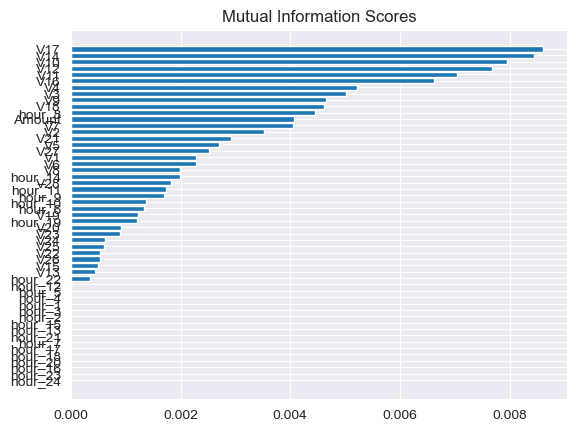

In [240]:
plot_mi_scores(mi_scores)

### Forward / Backward selection

In [106]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb 

##### Forward

In [ ]:
feat_select_model = RandomForestClassifier()
sfs_fwd = SequentialFeatureSelector(feat_select_model, n_features_to_select='auto', direction='forward',\
                                     scoring='f1', cv=3, n_jobs=-1) # ‘recall’, ‘roc_auc’
sfs_fwd.fit(X_train, y_train)

In [ ]:
sfs_fwd.n_features_to_select_

In [ ]:
feature_mask_fwd = sfs_fwd.support_

result_list_fwd = [X_train.columns[i] for i in range(len(X_train.columns)) if feature_mask_fwd[i]]
print(result_list_fwd)

tol=0.02 → ['V10', 'V12', 'V14', 'Amount']

##### Backward

In [ ]:
sfs_bwd = SequentialFeatureSelector(feat_select_model, n_features_to_select='auto', direction='backward',\
                                     scoring='f1', cv=3, n_jobs=-1) # ‘recall’, ‘roc_auc’
sfs_bwd.fit(X_train, y_train)

In [ ]:
sfs_bwd.n_features_to_select_

In [ ]:
feature_mask_bwd = sfs_bwd.support_

result_list_bwd = [X_train.columns[i] for i in range(len(X_train.columns)) if feature_mask_bwd[i]]
print(result_list_bwd)

### Best subset selection

In [93]:
from itertools import combinations
from sklearn.model_selection import cross_val_score

def best_subset(estimator, X, y, max_size=8, cv=5):
    '''Calculates the best model of up to max_size features of X.
   estimator must have a fit and score functions.
   X must be a DataFrame.'''

    n_features = X.shape[1]
    subsets = (combinations(range(n_features), k + 1) 
               for k in range(min(n_features, max_size)))

    best_size_subset = []
    for subsets_k in subsets:  # for each list of subsets of the same size
        best_score = -np.inf
        best_subset = None
        for subset in subsets_k: # for each subset
            estimator.fit(X.iloc[:, list(subset)], y)
            # get the subset with the best score among subsets of the same size
            score = estimator.score(X.iloc[:, list(subset)], y)
            if score > best_score:
                best_score, best_subset = score, subset
        # to compare subsets of different sizes we must use CV
        # first store the best subset of each size
        best_size_subset.append(best_subset)

    # compare best subsets of each size
    best_score = -np.inf
    best_subset = None
    list_scores = []
    for subset in best_size_subset:
        score = cross_val_score(estimator, X.iloc[:, list(subset)], y, cv=cv).mean()
        list_scores.append(score)
        if score > best_score:
            best_score, best_subset = score, subset

    return best_subset, best_score, best_size_subset, list_scores

In [132]:
b_subset, b_score, b_size, b_list_scores = best_subset(feat_select_model, raw_train[:10], y_train[:10], max_size=20, cv=3)

In [ ]:
print(f'Best subset: {b_subset}', end='\n\n')
print(f'Best subset: {b_score}', end='\n\n')
print(f'Best subset: {b_size}', end='\n\n')
print(f'Best subset: {b_list_scores}', end='\n\n')

# Models

In [228]:
from IPython.display import display
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import balanced_accuracy_score

from sklearn.ensemble import RandomForestClassifier #proba #featimp
from imblearn.ensemble import BalancedRandomForestClassifier #proba #featimp
from sklearn.linear_model import LogisticRegression #proba #coef
from sklearn.svm import SVC #kernel #proba #coef 
from sklearn.neighbors import KNeighborsClassifier #proba
from sklearn.naive_bayes import GaussianNB #proba
from sklearn.ensemble import AdaBoostClassifier #proba #featimp
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis #proba
from sklearn.neural_network import MLPClassifier #coef #proba
import xgboost as xgb #featimp #coef #proba

In [229]:
rf_clf = RandomForestClassifier() #proba #featimp
brf_clf = BalancedRandomForestClassifier() #proba #featimp
lr_clf = LogisticRegression() #proba #coef
svc_rbf_clf = SVC(kernel='rbf', probability=True) #kernel #proba #coef 
svc_ploy_clf = SVC(kernel='poly', probability=True)
knn_clf = KNeighborsClassifier() #proba
gnb_clf = GaussianNB() #proba
ada_clf = AdaBoostClassifier() #proba #featimp
qda_clf = QuadraticDiscriminantAnalysis() #proba
mlp_clf = MLPClassifier() #coef #proba
xgb_clf = xgb.XGBClassifier() #featimp #coef #proba
xgbrf_clf = xgb.XGBRFClassifier() #featimp #coef #proba

In [233]:
def model_tester(clf, clf_name):
    print(f'============ {clf_name} ============')
    clf.fit(X_train, y_train)
    try:
        feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': clf.feature_importances_})
        print(feature_importances.sort_values('importance', ascending=False, inplace=True))
    except Exception as e: 
        print(e)
        print(f'The {clf_name} model does not have a feature importance parameter')
        
    try:
        coefs = pd.DataFrame({'feature': X_train.columns, 'coef': clf.coef_})
        print(coefs.sort_values('coef', ascending=False, inplace=True))
    except Exception as e: 
        print(e)
        print(f'The {clf_name} model does not have a coef parameter')
        
    y_pred = clf.predict(X_val)
    
    print(metrics.classification_report(y_val, y_pred, digits=4), end='\n\n===============================================\n')
    bal_acc_score = balanced_accuracy_score(y_val, y_pred)
#     print(bal_acc_score, end='\n\n===============================================\n')
    precisions, recalls, thresholds = precision_recall_curve(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    y_prob = clf.predict_proba(X_val)[:,1]
    fpr, tpr, thresholds = roc_curve(y_val, y_prob)
    plot_roc_curve(fpr,tpr)
    plt.show()
    rocauc_score = roc_auc_score(y_val, y_prob)
    print(f'ROC AUC score: {rocauc_score}', end='\n\n===============================================\n')
    conf_mtr = confusion_matrix(y_val, y_pred)
    print(conf_mtr, end='\n\n===============================================\n')
    return [bal_acc_score,precisions, recalls, f1, conf_mtr[0,1], conf_mtr[1,0]]

In [234]:
model_names = ['rf_clf', 'brf_clf', 'lr_clf', 'svc_rbf_clf', 'svc_ploy_clf', 'knn_clf', 'gnb_clf', 'ada_clf',\
               'qda_clf', 'mlp_clf', 'xgb_clf', 'xgbrf_clf']
models = [rf_clf, brf_clf, lr_clf, svc_rbf_clf, svc_ploy_clf, knn_clf, gnb_clf, ada_clf, qda_clf, mlp_clf, xgb_clf, xgbrf_clf]

============ rf_clf ============
None
'RandomForestClassifier' object has no attribute 'coef_'
The rf_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56863
           1     0.9351    0.7347    0.8229        98

    accuracy                         0.9995     56961
   macro avg     0.9673    0.8673    0.9113     56961
weighted avg     0.9994    0.9995    0.9994     56961




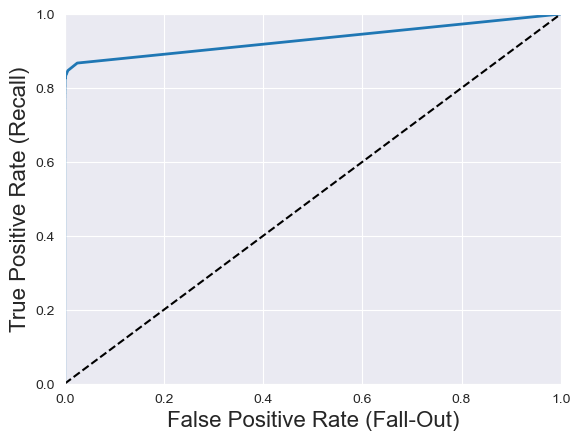

ROC AUC score: 0.9315667230260198

[[56858     5]
 [   26    72]]

============ brf_clf ============


C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

None
'BalancedRandomForestClassifier' object has no attribute 'coef_'
The brf_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9997    0.9809    0.9902     56863
           1     0.0711    0.8469    0.1311        98

    accuracy                         0.9807     56961
   macro avg     0.5354    0.9139    0.5607     56961
weighted avg     0.9981    0.9807    0.9888     56961




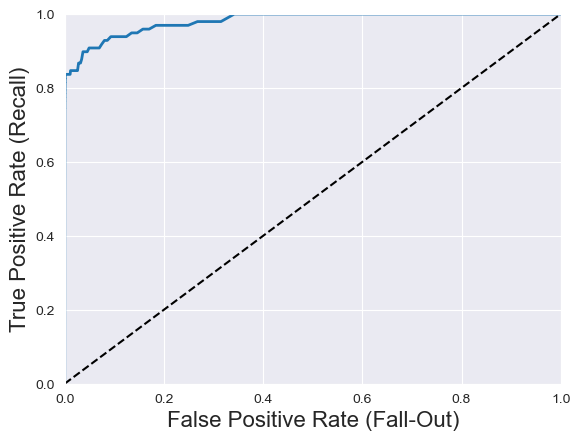

ROC AUC score: 0.9812246548901817

[[55778  1085]
 [   15    83]]

============ lr_clf ============
'LogisticRegression' object has no attribute 'feature_importances_'
The lr_clf model does not have a feature importance parameter
Per-column arrays must each be 1-dimensional
The lr_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9994    0.9997    0.9995     56863
           1     0.7848    0.6327    0.7006        98

    accuracy                         0.9991     56961
   macro avg     0.8921    0.8162    0.8500     56961
weighted avg     0.9990    0.9991    0.9990     56961




C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


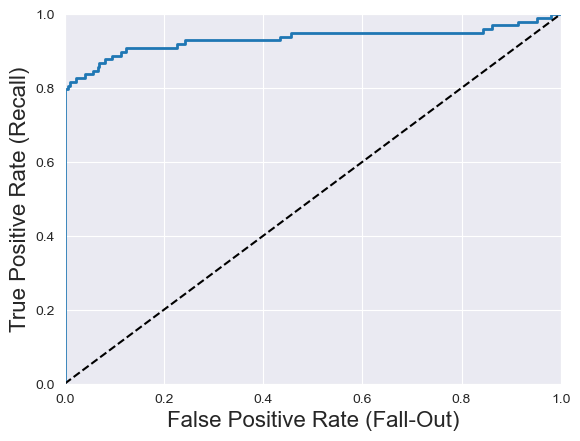

ROC AUC score: 0.9325502003203546

[[56846    17]
 [   36    62]]

============ svc_rbf_clf ============
'SVC' object has no attribute 'feature_importances_'
The svc_rbf_clf model does not have a feature importance parameter
coef_ is only available when using a linear kernel
The svc_rbf_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9988    0.9998    0.9993     56863
           1     0.7273    0.3265    0.4507        98

    accuracy                         0.9986     56961
   macro avg     0.8631    0.6632    0.7250     56961
weighted avg     0.9984    0.9986    0.9984     56961




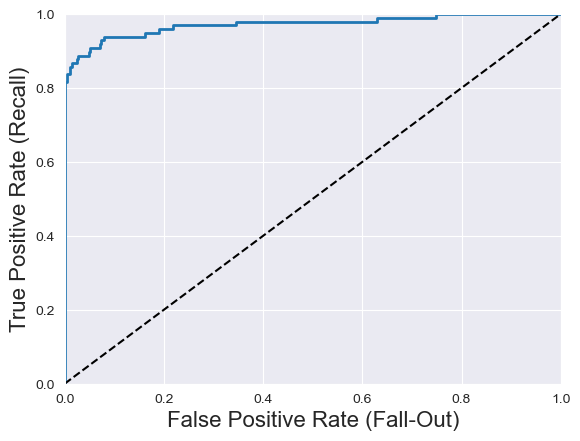

ROC AUC score: 0.9721516484123853

[[56851    12]
 [   66    32]]

============ svc_ploy_clf ============
'SVC' object has no attribute 'feature_importances_'
The svc_ploy_clf model does not have a feature importance parameter
coef_ is only available when using a linear kernel
The svc_ploy_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9983    1.0000    0.9992     56863
           1     0.6667    0.0408    0.0769        98

    accuracy                         0.9983     56961
   macro avg     0.8325    0.5204    0.5380     56961
weighted avg     0.9978    0.9983    0.9976     56961




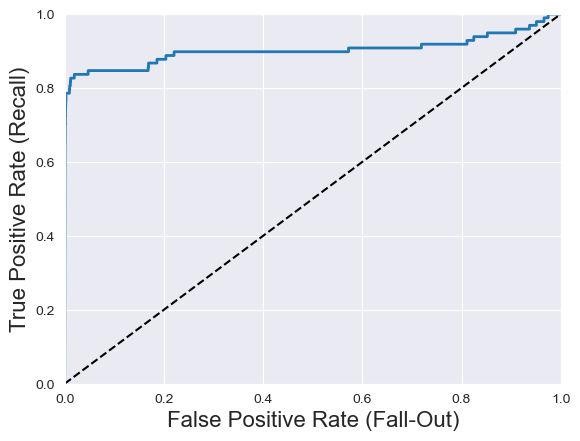

ROC AUC score: 0.9019497991412945

[[56861     2]
 [   94     4]]

============ knn_clf ============
'KNeighborsClassifier' object has no attribute 'feature_importances_'
The knn_clf model does not have a feature importance parameter
'KNeighborsClassifier' object has no attribute 'coef_'
The knn_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9993    0.9999    0.9996     56863
           1     0.9091    0.6122    0.7317        98

    accuracy                         0.9992     56961
   macro avg     0.9542    0.8061    0.8657     56961
weighted avg     0.9992    0.9992    0.9992     56961




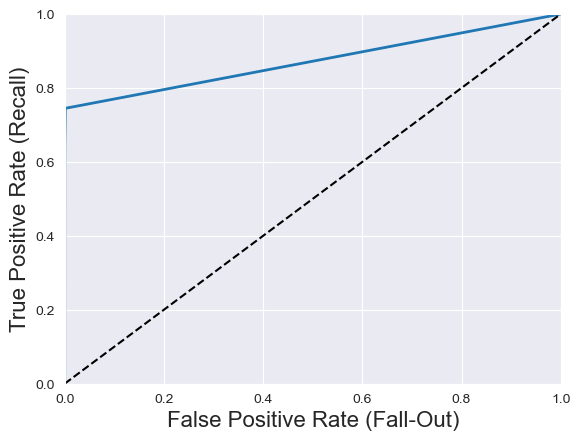

ROC AUC score: 0.8722091442841315

[[56857     6]
 [   38    60]]

============ gnb_clf ============
'GaussianNB' object has no attribute 'feature_importances_'
The gnb_clf model does not have a feature importance parameter
'GaussianNB' object has no attribute 'coef_'
The gnb_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9997    0.9588    0.9788     56863
           1     0.0326    0.8061    0.0627        98

    accuracy                         0.9585     56961
   macro avg     0.5161    0.8825    0.5207     56961
weighted avg     0.9980    0.9585    0.9772     56961




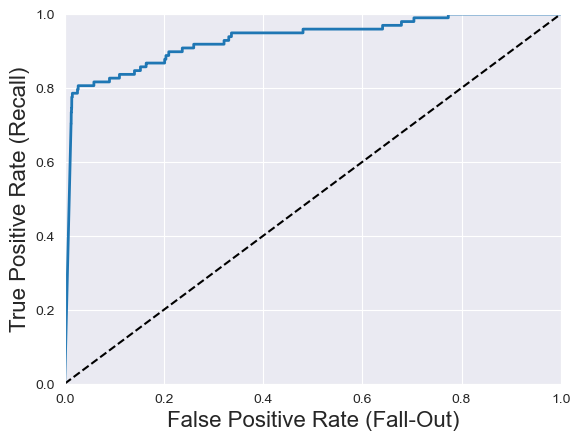

ROC AUC score: 0.9317380083243398

[[54520  2343]
 [   19    79]]

============ ada_clf ============
None
'AdaBoostClassifier' object has no attribute 'coef_'
The ada_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9994    0.9997    0.9995     56863
           1     0.7750    0.6327    0.6966        98

    accuracy                         0.9991     56961
   macro avg     0.8872    0.8162    0.8481     56961
weighted avg     0.9990    0.9991    0.9990     56961




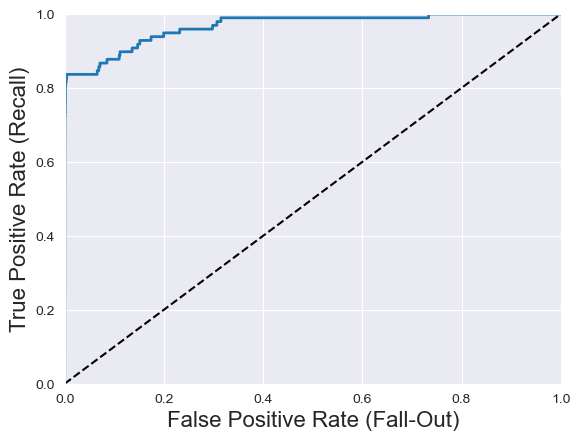

ROC AUC score: 0.967029598889131

[[56845    18]
 [   36    62]]

============ qda_clf ============


C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


'QuadraticDiscriminantAnalysis' object has no attribute 'feature_importances_'
The qda_clf model does not have a feature importance parameter
'QuadraticDiscriminantAnalysis' object has no attribute 'coef_'
The qda_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9997    0.9707    0.9850     56863
           1     0.0459    0.8163    0.0869        98

    accuracy                         0.9705     56961
   macro avg     0.5228    0.8935    0.5359     56961
weighted avg     0.9980    0.9705    0.9834     56961




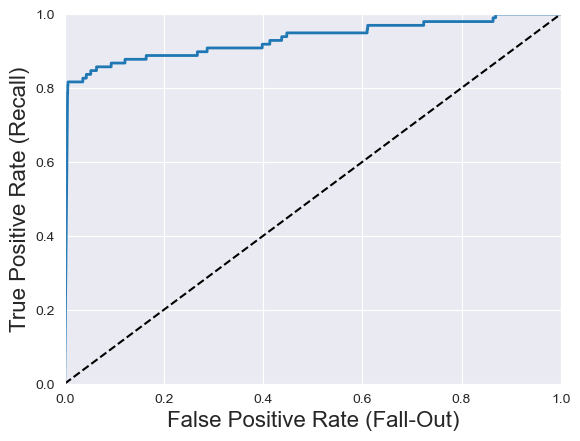

ROC AUC score: 0.9313035591810894

[[55199  1664]
 [   18    80]]

============ mlp_clf ============
'MLPClassifier' object has no attribute 'feature_importances_'
The mlp_clf model does not have a feature importance parameter
'MLPClassifier' object has no attribute 'coef_'
The mlp_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9995    0.9998    0.9996     56863
           1     0.8701    0.6837    0.7657        98

    accuracy                         0.9993     56961
   macro avg     0.9348    0.8417    0.8827     56961
weighted avg     0.9992    0.9993    0.9992     56961




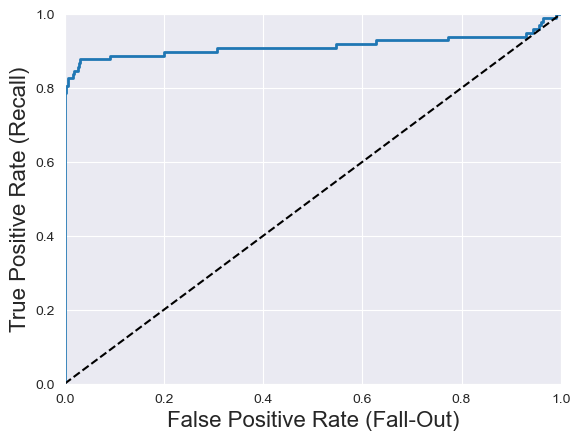

ROC AUC score: 0.9139724299758065

[[56853    10]
 [   31    67]]

============ xgb_clf ============
None
Coefficients are not defined for Booster type None
The xgb_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56863
           1     0.9375    0.7653    0.8427        98

    accuracy                         0.9995     56961
   macro avg     0.9685    0.8826    0.9212     56961
weighted avg     0.9995    0.9995    0.9995     56961




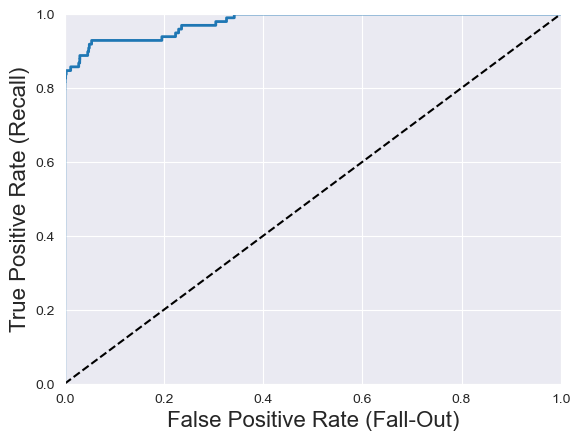

ROC AUC score: 0.9779187319899207

[[56858     5]
 [   23    75]]

============ xgbrf_clf ============
None
Coefficients are not defined for Booster type None
The xgbrf_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     56863
           1     0.8750    0.7857    0.8280        98

    accuracy                         0.9994     56961
   macro avg     0.9373    0.8928    0.9138     56961
weighted avg     0.9994    0.9994    0.9994     56961




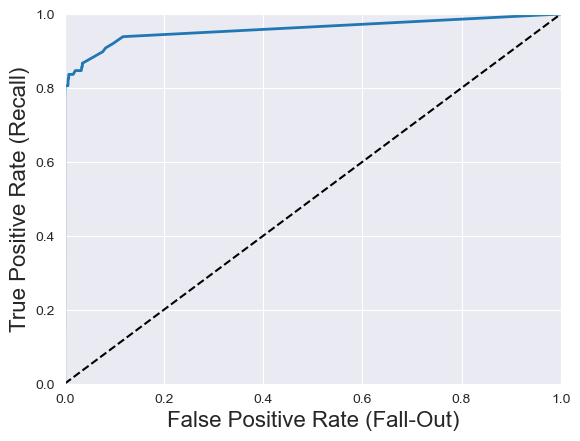

ROC AUC score: 0.9590715170404198

[[56852    11]
 [   21    77]]



In [235]:
eval_dict = dict()

for i, m in enumerate(models):
    eval_dict[model_names[i]] = model_tester(m, model_names[i])

In [247]:
eval_df = pd.DataFrame(data=eval_dict.values(), index=eval_dict.keys(),\
                       columns=['bal_acc_score','precisions', 'recalls', 'f1', 'false_positives', 'false_negatives'])

In [248]:
eval_df

,bal_acc_score,precisions,recalls,f1,false_positives,false_negatives
rf_clf,0.867303,"[0.0017204754130018785, 0.935064935064935, 1.0]","[1.0, 0.7346938775510204, 0.0]",0.822857,5,26
brf_clf,0.913929,"[0.0017204754130018785, 0.07106164383561644, 1.0]","[1.0, 0.8469387755102041, 0.0]",0.131122,1085,15
lr_clf,0.816177,"[0.0017204754130018785, 0.7848101265822784, 1.0]","[1.0, 0.6326530612244898, 0.0]",0.700565,17,36
svc_rbf_clf,0.663160,"[0.0017204754130018785, 0.7272727272727273, 1.0]","[1.0, 0.32653061224489793, 0.0]",0.450704,12,66
svc_ploy_clf,0.520391,"[0.0017204754130018785, 0.6666666666666666, 1.0]","[1.0, 0.04081632653061224, 0.0]",0.076923,2,94
knn_clf,0.806070,"[0.0017204754130018785, 0.9090909090909091, 1.0]","[1.0, 0.6122448979591837, 0.0]",0.731707,6,38
gnb_clf,0.882459,"[0.0017204754130018785, 0.032617671345995046, ...","[1.0, 0.8061224489795918, 0.0]",0.062698,2343,19
ada_clf,0.816168,"[0.0017204754130018785, 0.775, 1.0]","[1.0, 0.6326530612244898, 0.0]",0.696629,18,36
qda_clf,0.893532,"[0.0017204754130018785, 0.045871559633027525, ...","[1.0, 0.8163265306122449, 0.0]",0.086862,1664,18
mlp_clf,0.841749,"[0.0017204754130018785, 0.8701298701298701, 1.0]","[1.0, 0.6836734693877551, 0.0]",0.765714,10,31


# ------------------POC----------------------------------------- 


In [118]:
# Splitint training data for POC purposes (only about 2 mln instances)

raw_train.shape

(170884, 32)

In [119]:
raw_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,hour
109011,71174.000,-2.108,1.173,1.614,0.483,0.067,-0.191,0.191,-1.706,-0.178,...,-0.389,0.260,0.341,0.400,-0.413,-0.348,0.215,19.990,0,20
280683,169683.000,2.314,-1.311,-1.421,-1.724,-1.003,-0.913,-0.899,-0.222,-1.658,...,0.665,0.029,-0.348,0.069,0.074,-0.024,-0.076,15.000,0,24
158318,111127.000,2.105,0.155,-1.403,0.311,0.504,-0.691,0.139,-0.418,1.895,...,0.760,-0.022,0.465,0.403,-0.479,-0.017,-0.054,1.000,0,7
243733,152052.000,2.072,-0.016,-1.311,0.373,-0.063,-1.381,0.244,-0.394,0.631,...,0.858,0.003,0.077,0.259,-0.110,-0.021,-0.059,1.990,0,19
177016,123008.000,2.046,0.156,-2.007,0.385,0.604,-0.757,0.232,-0.231,0.072,...,1.166,-0.109,0.794,0.377,0.838,-0.075,-0.053,1.570,0,11


In [140]:
drop_list = ['Class', 'hour']

X_train_poc = raw_train.drop(drop_list, axis=1)
X_train_poc

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
109011,71174.000,-2.108,1.173,1.614,0.483,0.067,-0.191,0.191,-1.706,-0.178,...,-0.809,1.521,-0.389,0.260,0.341,0.400,-0.413,-0.348,0.215,19.990
280683,169683.000,2.314,-1.311,-1.421,-1.724,-1.003,-0.913,-0.899,-0.222,-1.658,...,-0.487,0.089,0.665,0.029,-0.348,0.069,0.074,-0.024,-0.076,15.000
158318,111127.000,2.105,0.155,-1.403,0.311,0.504,-0.691,0.139,-0.418,1.895,...,-0.193,0.108,0.760,-0.022,0.465,0.403,-0.479,-0.017,-0.054,1.000
243733,152052.000,2.072,-0.016,-1.311,0.373,-0.063,-1.381,0.244,-0.394,0.631,...,-0.260,0.243,0.858,0.003,0.077,0.259,-0.110,-0.021,-0.059,1.990
177016,123008.000,2.046,0.156,-2.007,0.385,0.604,-0.757,0.232,-0.231,0.072,...,-0.112,0.327,1.166,-0.109,0.794,0.377,0.838,-0.075,-0.053,1.570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,2937.000,-0.415,0.713,1.222,-2.108,0.187,-1.282,1.119,-0.345,0.463,...,0.075,0.133,0.757,-0.291,0.559,0.037,-0.872,0.239,-0.020,1.000
233802,147710.000,1.994,-0.517,-0.620,0.130,-0.285,0.395,-0.822,0.232,0.996,...,-0.174,0.263,0.885,0.099,0.276,-0.195,0.624,-0.032,-0.059,5.990
85418,60764.000,-1.498,0.658,1.582,-0.024,0.585,1.303,0.609,0.136,0.453,...,-0.225,-0.072,0.299,0.110,-0.616,-0.426,0.264,-0.448,0.045,36.990
29062,35301.000,1.070,0.072,0.497,1.505,-0.380,-0.370,0.101,-0.027,0.320,...,-0.149,-0.062,-0.045,-0.050,0.400,0.593,-0.335,0.031,0.025,45.420


In [141]:
print("X_train_poc set dimensions: ", X_train_poc.shape)
print("y_train set dimensions: ", y_train.shape)

X_train_poc set dimensions:  (170884, 30)
y_train set dimensions:  (170884,)


# ------------------------ Training ---------------------

In [413]:
from sklearn.ensemble import RandomForestClassifier

In [415]:
clf = RandomForestClassifier()
clf.fit(X_train_poc, y_train)

RandomForestClassifier()

In [416]:
# to show floats with 3 decimal places
pd.options.display.float_format = '{:.3f}'.format

feature_importances = pd.DataFrame({'feature': X_train_poc.columns, 'importance': clf.feature_importances_})
feature_importances.sort_values('importance', ascending=False, inplace=True)
print(feature_importances)

   feature  importance
17     V17       0.174
12     V12       0.116
14     V14       0.109
10     V10       0.099
16     V16       0.066
11     V11       0.064
9       V9       0.041
18     V18       0.034
4       V4       0.027
7       V7       0.024
3       V3       0.024
21     V21       0.020
26     V26       0.017
1       V1       0.015
6       V6       0.014
5       V5       0.014
8       V8       0.013
29  Amount       0.012
2       V2       0.011
13     V13       0.011
15     V15       0.011
19     V19       0.011
0     Time       0.011
20     V20       0.011
22     V22       0.010
27     V27       0.010
25     V25       0.008
24     V24       0.008
28     V28       0.008
23     V23       0.007


# ---------Testing and performance analysis---------

### Data preparation

In [417]:
raw_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
148361,89763.000,0.288,0.465,1.052,-0.668,0.413,-0.030,0.520,-0.147,0.628,...,-0.166,-0.200,0.093,0.575,-0.622,-0.750,-0.082,-0.195,2.490,0
249261,154320.000,1.748,-0.820,-0.086,0.276,-1.067,-0.492,-0.590,-0.087,1.426,...,0.116,0.300,0.168,0.015,-0.466,-0.109,0.014,-0.009,128.870,0
87264,61606.000,0.887,-0.374,2.307,3.179,-1.717,0.528,-1.108,0.396,1.034,...,0.156,0.672,-0.087,0.950,0.319,0.192,0.070,0.056,72.000,0
188431,127974.000,-2.023,2.214,-2.098,-1.042,-0.121,-0.028,-0.595,1.821,-0.392,...,-0.202,-0.811,0.165,-0.360,-0.104,0.173,0.061,-0.003,9.990,0
18438,29499.000,1.043,0.011,1.589,2.954,-0.893,0.640,-0.746,0.378,0.590,...,0.059,0.513,-0.048,0.415,0.465,0.226,0.059,0.025,1.520,0


In [418]:
raw_test.shape

(56962, 31)

In [142]:
X_test_poc = raw_test.drop(columns = ['Class'], axis=1) #droppig the same columns as in case of training set
y_test_poc = raw_test['Class'] #getting labels

print(X_test_poc.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


### Predictions

In [451]:
y_pred =clf.predict(X_test_poc)


### Performance analysis

In [421]:
print(metrics.classification_report(y_test_poc, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     56863
           1     0.9647    0.8283    0.8913        99

    accuracy                         0.9996     56962
   macro avg     0.9822    0.9141    0.9456     56962
weighted avg     0.9996    0.9996    0.9996     56962



In [452]:
balanced_accuracy_score(y_test_poc, y_pred)

0.9141150349493209

In [422]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test_poc, y_pred)

### ROC curve

**<code style="background:yellow;color:blue"> FROM THE BOOK </code>**

The roc_curve() function expects labels and scores, but instead of scores you can
give it class probabilities. Let’s use the positive class’s probability as the score:

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class 

In [423]:
y_prob = clf.predict_proba(X_test_poc)[:,1]

In [219]:
from sklearn.metrics import roc_curve

# fpr, tpr, thresholds = roc_curve(y_test_poc, y_prob)

In [217]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)

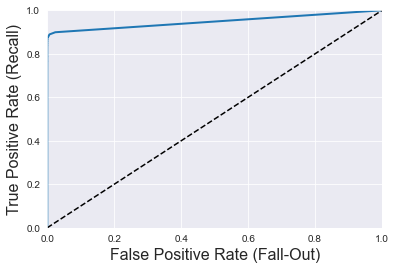

In [426]:
plot_roc_curve(fpr,tpr)
plt.show()

In [427]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_poc, y_prob)

0.9480734041432562

In [428]:
#metrics.ConfusionMatrixDisplay.from_predictions(y_test_poc, y_pred)
#plt.show()

In [215]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test_poc, y_pred)

NameError: name 'y_pred' is not defined

### **<code style="background:lightgreen;color:black"> Observations:</code>** 
  Not bad but still can be better. Especially if it goes to recall on Frauds. 

# -------------------- With hour instead of Time -------------------

In [287]:
drop_list1 = ['Class', 'Time']
X_train_poc1 = train_t.drop(drop_list1, axis=1)
X_train_poc1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,hour
109011,-2.108,1.173,1.614,0.483,0.067,-0.191,0.191,-1.706,-0.178,0.023,...,1.521,-0.389,0.260,0.341,0.400,-0.413,-0.348,0.215,19.990,20
280683,2.314,-1.311,-1.421,-1.724,-1.003,-0.913,-0.899,-0.222,-1.658,1.890,...,0.089,0.665,0.029,-0.348,0.069,0.074,-0.024,-0.076,15.000,24
158318,2.105,0.155,-1.403,0.311,0.504,-0.691,0.139,-0.418,1.895,-0.501,...,0.108,0.760,-0.022,0.465,0.403,-0.479,-0.017,-0.054,1.000,7
243733,2.072,-0.016,-1.311,0.373,-0.063,-1.381,0.244,-0.394,0.631,0.022,...,0.243,0.858,0.003,0.077,0.259,-0.110,-0.021,-0.059,1.990,19
177016,2.046,0.156,-2.007,0.385,0.604,-0.757,0.232,-0.231,0.072,-0.192,...,0.327,1.166,-0.109,0.794,0.377,0.838,-0.075,-0.053,1.570,11


In [289]:
# one-hot-encoded dataset
X_train_poc1 = pd.get_dummies(X_train_poc1, columns = ['hour'], prefix='hour')
X_train_poc1.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24
109011,-2.108,1.173,1.614,0.483,0.067,-0.191,0.191,-1.706,-0.178,0.023,...,0,0,0,0,0,1,0,0,0,0
280683,2.314,-1.311,-1.421,-1.724,-1.003,-0.913,-0.899,-0.222,-1.658,1.890,...,0,0,0,0,0,0,0,0,0,1
158318,2.105,0.155,-1.403,0.311,0.504,-0.691,0.139,-0.418,1.895,-0.501,...,0,0,0,0,0,0,0,0,0,0
243733,2.072,-0.016,-1.311,0.373,-0.063,-1.381,0.244,-0.394,0.631,0.022,...,0,0,0,0,1,0,0,0,0,0
177016,2.046,0.156,-2.007,0.385,0.604,-0.757,0.232,-0.231,0.072,-0.192,...,0,0,0,0,0,0,0,0,0,0
76252,1.210,0.005,0.665,0.847,-0.684,-0.654,-0.132,-0.075,0.590,-0.200,...,0,1,0,0,0,0,0,0,0,0
120209,-0.797,-0.556,1.468,-2.465,0.185,-1.288,-0.120,-0.187,-2.779,0.706,...,0,0,0,0,0,0,0,1,0,0
195576,-0.360,0.503,-1.280,-0.112,-0.167,-0.597,1.216,0.266,-0.398,-1.166,...,0,0,0,0,0,0,0,0,0,0
193050,-2.246,-1.757,1.385,-0.281,1.430,1.214,0.020,0.663,-0.159,-1.038,...,0,0,0,0,0,0,0,0,0,0
144159,-2.749,2.126,0.935,-0.069,-1.526,-0.426,-0.644,1.423,-0.184,-0.162,...,0,0,0,0,0,0,0,0,0,1


In [432]:
clf_s1 = RandomForestClassifier()
clf_s1.fit(X_train_poc1, y_train)

RandomForestClassifier()

In [433]:
# to show floats with 3 decimal places
pd.options.display.float_format = '{:.3f}'.format

feature_importances = pd.DataFrame({'feature': X_train_poc1.columns, 'importance': clf_s1.feature_importances_})
feature_importances.sort_values('importance', ascending=False, inplace=True)
print(feature_importances)

    feature  importance
16      V17       0.177
11      V12       0.138
13      V14       0.115
15      V16       0.081
9       V10       0.055
10      V11       0.048
8        V9       0.041
3        V4       0.034
17      V18       0.031
6        V7       0.025
1        V2       0.020
2        V3       0.019
25      V26       0.016
20      V21       0.015
4        V5       0.015
7        V8       0.014
19      V20       0.014
18      V19       0.014
26      V27       0.013
14      V15       0.012
0        V1       0.012
5        V6       0.011
28   Amount       0.010
21      V22       0.010
27      V28       0.009
12      V13       0.009
24      V25       0.009
23      V24       0.008
22      V23       0.007
35   hour_7       0.003
37   hour_9       0.002
29   hour_1       0.001
30   hour_2       0.001
46  hour_18       0.001
33   hour_5       0.001
31   hour_3       0.001
50  hour_22       0.001
51  hour_23       0.001
40  hour_12       0.001
42  hour_14       0.001
41  hour_13     

In [290]:
## Test dataset prepareation
raw_test['hour'] = ((((raw_test['Time']) // (60 * 60)) % 24) + 1) # I calculate floor to get hours. As a result I get values from 0 to 47. Next I calulate modulo 24 -> I got values from 0 to 23. Last step adding 1 to get values from 1 to 24.
raw_test['hour'] = raw_test['hour'].astype(int)
print(raw_test['hour'].min(), raw_test['hour'].max())

X_test_poc1 = raw_test.drop(drop_list1, axis=1)
y_test = raw_test['Class']

1 24


In [291]:
# one-hot-encoded dataset
X_test_poc1 = pd.get_dummies(X_test_poc1, columns = ['hour'], prefix='hour')
X_test_poc1.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24
148361,0.288,0.465,1.052,-0.668,0.413,-0.030,0.520,-0.147,0.628,-0.643,...,0,0,0,0,0,0,0,0,0,0
249261,1.748,-0.820,-0.086,0.276,-1.067,-0.492,-0.590,-0.087,1.426,-0.306,...,0,0,0,0,1,0,0,0,0,0
87264,0.887,-0.374,2.307,3.179,-1.717,0.528,-1.108,0.396,1.034,0.286,...,0,0,0,1,0,0,0,0,0,0
188431,-2.023,2.214,-2.098,-1.042,-0.121,-0.028,-0.595,1.821,-0.392,-0.234,...,0,0,0,0,0,0,0,0,0,0
18438,1.043,0.011,1.589,2.954,-0.893,0.640,-0.746,0.378,0.590,0.369,...,0,0,0,0,0,0,0,0,0,0
268828,-1.651,-1.022,1.644,0.725,2.470,-1.680,-0.162,-0.124,-0.053,-0.346,...,0,0,0,0,0,0,0,1,0,0
262259,1.919,0.165,-2.046,1.482,0.542,-1.052,0.533,-0.279,0.422,-0.239,...,0,0,0,0,0,0,1,0,0,0
184180,0.175,0.381,0.452,-0.443,0.382,-0.678,1.174,-0.415,0.342,-0.485,...,0,0,0,0,0,0,0,0,0,0
13551,-1.557,0.799,0.856,-0.017,0.541,-1.222,0.517,0.126,0.610,-1.034,...,0,0,0,0,0,0,0,0,0,0
78757,1.486,-0.388,0.188,-0.907,-0.576,-0.475,-0.527,-0.171,-0.816,0.593,...,0,0,1,0,0,0,0,0,0,0


In [436]:
y_pred1 =clf_s1.predict(X_test_poc1)

In [437]:
print(metrics.classification_report(y_test, y_pred1, digits=4))

              precision    recall  f1-score   support

           0     0.9997    1.0000    0.9998     56863
           1     0.9762    0.8283    0.8962        99

    accuracy                         0.9997     56962
   macro avg     0.9879    0.9141    0.9480     56962
weighted avg     0.9997    0.9997    0.9997     56962



In [449]:
balanced_accuracy_score(y_test, y_pred1)

0.9141238280133519

In [438]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred1)

# ---------------- ROC curve--------------------------

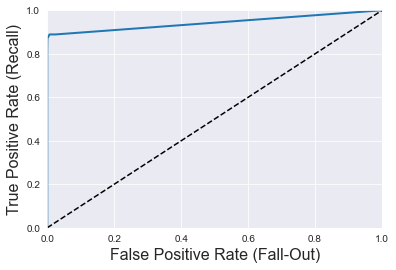

In [439]:
y_prob1 = clf_s1.predict_proba(X_test_poc1)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob1)

plot_roc_curve(fpr,tpr)
plt.show()

In [440]:
roc_auc_score(y_test, y_prob1)

0.9430509658425877

In [441]:
confusion_matrix(y_test, y_pred1)

array([[56861,     2],
       [   17,    82]], dtype=int64)

### Observation:

- it is not better.

NEXT STEPS:
- check the result after removing the 'time' column
- deside which feature shouls stay. Maybe it would be good to run lasso and compare the feature importance from RF and lasso. Based on that maybe it will be possible to deside which features are more important. 


# --------------- Balanced Random Forest --------------

In [442]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

brf = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
brf.fit(X_train_poc, y_train)

BalancedRandomForestClassifier(random_state=0)

In [443]:
y_pred = brf.predict(X_test_poc)
balanced_accuracy_score(y_test_poc, y_pred)

0.9376682783731304

In [444]:
print(metrics.classification_report(y_test_poc, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9998    0.9763    0.9879     56863
           1     0.0621    0.8990    0.1161        99

    accuracy                         0.9762     56962
   macro avg     0.5309    0.9377    0.5520     56962
weighted avg     0.9982    0.9762    0.9864     56962



In [445]:
precisions, recalls, thresholds = precision_recall_curve(y_test_poc, y_pred)

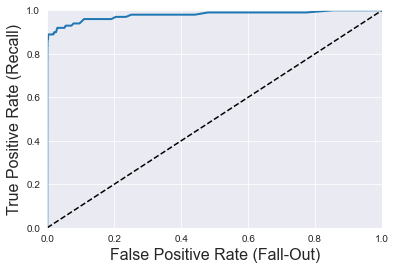

In [446]:
y_prob = brf.predict_proba(X_test_poc)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_poc, y_prob)

plot_roc_curve(fpr,tpr)
plt.show()

In [447]:
roc_auc_score(y_test_poc, y_prob)

0.9783640886291117

In [448]:
confusion_matrix(y_test_poc, y_pred)

array([[55518,  1345],
       [   10,    89]], dtype=int64)

# This model could be chosen in an ensemble because it is better at recall but very bad in precision

### -> just to check how the feature importance looks for this model

In [456]:
# to show floats with 3 decimal places
pd.options.display.float_format = '{:.3f}'.format

feature_importances = pd.DataFrame({'feature': X_train_poc.columns, 'importance': brf.feature_importances_})
feature_importances.sort_values('importance', ascending=False, inplace=True)
print(feature_importances)

   feature  importance
14     V14       0.178
10     V10       0.131
4       V4       0.101
12     V12       0.084
11     V11       0.084
3       V3       0.063
17     V17       0.053
7       V7       0.040
16     V16       0.037
9       V9       0.024
2       V2       0.023
21     V21       0.018
6       V6       0.014
1       V1       0.014
5       V5       0.013
29  Amount       0.012
20     V20       0.012
19     V19       0.011
18     V18       0.010
8       V8       0.009
13     V13       0.009
27     V27       0.008
26     V26       0.008
15     V15       0.007
28     V28       0.007
0     Time       0.006
25     V25       0.006
23     V23       0.005
24     V24       0.005
22     V22       0.005


## Logistic regression

In [122]:
from sklearn.linear_model import LogisticRegression

In [292]:
lr_clf = LogisticRegression(penalty='l1', solver='liblinear')
lr_clf.fit(X_train_poc1, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [293]:
y_pred_lr = lr_clf.predict(X_test_poc1)

In [294]:
log_importance = dict(zip(list(X_test_poc1.columns), lr_clf.coef_.tolist()[0]))

In [295]:
pd.DataFrame(index=log_importance.keys(), data=log_importance.values()).sort_values(0, ascending=False)

,0
hour_3,1.966
hour_5,1.243
V4,0.796
V22,0.461
hour_18,0.425
V21,0.347
V24,0.191
V26,0.185
hour_14,0.140
V5,0.135


In [144]:
print(metrics.classification_report(y_test_poc, y_pred_lr, digits=4))

              precision    recall  f1-score   support

           0     0.9995    0.9998    0.9996     56863
           1     0.8608    0.6869    0.7640        99

    accuracy                         0.9993     56962
   macro avg     0.9301    0.8433    0.8818     56962
weighted avg     0.9992    0.9993    0.9992     56962



In [154]:
precisions, recalls, thresholds = precision_recall_curve(y_test_poc, y_pred_lr)

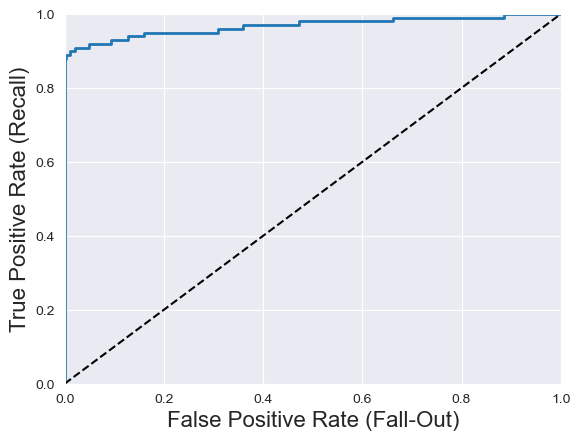

In [174]:
y_prob_lr = lr_clf.predict_proba(X_test_poc)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_poc, y_prob_lr)

plot_roc_curve(fpr,tpr)
plt.show()

In [182]:
roc_auc_score(y_test_poc, y_prob_lr)

0.968036235239865

In [170]:
confusion_matrix(y_test_poc, y_pred_lr)

array([[56852,    11],
       [   31,    68]], dtype=int64)

## XGBoost

In [149]:
# pip install xgboost

In [115]:
import xgboost as xgb

In [116]:
xgb_clf = xgb.XGBClassifier()

In [121]:
xgb_clf.fit(raw_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [131]:
xgb_feat_imp = dict(zip(raw_train.columns, xgb_clf.feature_importances_))
pd.DataFrame(data=xgb_feat_imp.values(), index=xgb_feat_imp.keys()).sort_values(0, ascending=False)

,0
V17,0.391914
V14,0.063454
V7,0.039673
V10,0.037395
V4,0.034003
V12,0.033133
V1,0.025244
V27,0.024466
V21,0.023888
Amount,0.021643


In [152]:
y_pred_xgb = xgb_clf.predict(X_test_poc)

In [153]:
print(metrics.classification_report(y_test_poc, y_pred_xgb, digits=4))

              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     56863
           1     0.9529    0.8182    0.8804        99

    accuracy                         0.9996     56962
   macro avg     0.9763    0.9091    0.9401     56962
weighted avg     0.9996    0.9996    0.9996     56962



In [162]:
precisions, recalls, thresholds = precision_recall_curve(y_test_poc, y_pred_xgb)

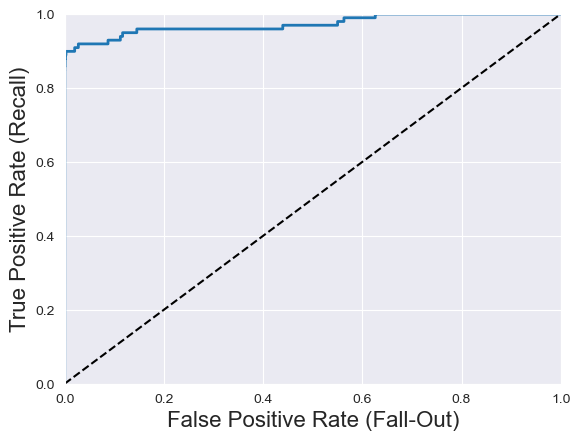

In [179]:
y_prob_xgb = xgb_clf.predict_proba(X_test_poc)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_poc, y_prob_xgb)

plot_roc_curve(fpr,tpr)
plt.show()

In [183]:
roc_auc_score(y_test_poc, y_prob_xgb)

0.9727876872944843

In [181]:
confusion_matrix(y_test_poc, y_pred_xgb)

array([[56859,     4],
       [   18,    81]], dtype=int64)

In [ ]:
# Model function

def model_tester(model, X_train, X_val, y, scaled=False, hour=False):
    """The datasets Amount values are not scaled, and the Time column is based on seconds.
    With scaled=True, we will scale the Amount column.
    With hour=True, we will use the hours instead of seconds.
    """
    if scaled==False:
        if hour==True:
            train_t = X_train
            train_t['hour'] = ((((train_t['Time']) // (60 * 60)) % 24) + 1) # I calculate floor to get hours. As a result I get values from 0 to 47. Next I calulate modulo 24 -> I got values from 0 to 23. Last step adding 1 to get values from 1 to 24.
            train_t['hour'] = train_t['hour'].astype(int)
            
            
            
            
model.fit()

### KNN

In [216]:
from sklearn.neighbors import KNeighborsClassifier

In [256]:
knn = KNeighborsClassifier(n_neighbors=4)

In [257]:
knn.fit(X_train_poc, y_train)

KNeighborsClassifier(n_neighbors=4)

In [258]:
y_pred_knn = knn.predict(X_test_poc)

In [259]:
print(metrics.classification_report(y_test_poc, y_pred_knn, digits=4))

              precision    recall  f1-score   support

           0     0.9983    1.0000    0.9992     56863
           1     1.0000    0.0303    0.0588        99

    accuracy                         0.9983     56962
   macro avg     0.9992    0.5152    0.5290     56962
weighted avg     0.9983    0.9983    0.9975     56962



In [260]:
precisions, recalls, thresholds = precision_recall_curve(y_test_poc, y_pred_knn)

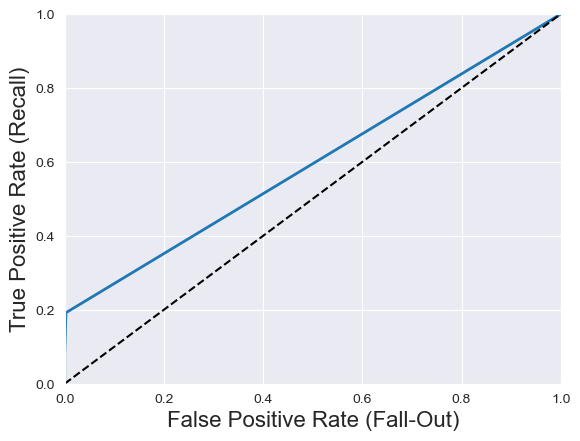

In [261]:
y_prob_knn = knn.predict_proba(X_test_poc)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_poc, y_prob_knn)

plot_roc_curve(fpr,tpr)
plt.show()

In [262]:
roc_auc_score(y_test_poc, y_prob_knn)

0.5948347054954163

In [263]:
confusion_matrix(y_test_poc, y_pred_knn)

array([[56863,     0],
       [   96,     3]], dtype=int64)

In [134]:
import Preprocessing_class

ModuleNotFoundError: No module named 'Preprocessing_class'